In [38]:
# conda activate py27_NLP
import pandas as pd

# First, run the mongoDB service on a terminal
# mongod (or sudo mongod)
from pymongo import MongoClient
client = MongoClient()

db_exams = client.chestxrays
collection = db_exams.metadata
collection.estimated_document_count()

2775902

In [3]:
# Get labels in DB
dLabelsInDB = dict()
res = collection.distinct("Annotations.Report.labels")
for i in res:
    if i == None:
        print format(i)
    dLabelsInDB[i] = 0
print dLabelsInDB

None
None
{u'right_upper_lobe_collapse': 0, u'mediastinum_displaced': 0, u'pleural_effusion': 0, u'subcutaneous_emphysema': 0, u'dextrocardia': 0, u'scoliosis': 0, u'right_lower_lobe_collapse': 0, u'parenchymal_lesion': 0, u'interstitial_shadowing': 0, u'rib_lesion': 0, u'unfolded_aorta': 0, u'mediastinum_widened': 0, u'hyperexpanded_lungs': 0, u'right_middle_lobe_collapse': 0, u'emphysema': 0, u'pneumomediastinum': 0, u'atelectasis': 0, u'hemidiaphragm_elevated': 0, u'ground_glass_opacification': 0, u'left_lower_lobe_collapse': 0, u'pleural_abnormality': 0, u'bronchial_wall_thickening': 0, u'pneumothorax': 0, u'normal': 0, u'pneumoperitoneum': 0, u'cardiomegaly': 0, u'object': 0, u'consolidation': 0, u'hernia': 0, None: 0, u'bulla': 0, u'left_upper_lobe_collapse': 0, u'dilated_bowel': 0, u'rib_fracture': 0, u'paratracheal_hilar_enlargement': 0, u'clavicle_fracture': 0, u'cavitating_lung_lesion': 0, u'aortic_calcification': 0}


In [4]:
# Count pressence of each label
for l in dLabelsInDB:
    if l == None:
        dLabelsInDB[l] = collection.count_documents({"Annotations.Report.labels": None,"PatientAge":{"$gt": 5840}})
    else:
        dLabelsInDB[l] = collection.count_documents({"Annotations.Report.labels": {"$exists": "true", "$in": [l]},"PatientAge":{"$gt": 5840}})
        

print dLabelsInDB
print sum(dLabelsInDB.values())

{u'right_upper_lobe_collapse': 15139, u'mediastinum_displaced': 2741, u'pleural_effusion': 214392, u'subcutaneous_emphysema': 13515, u'dextrocardia': 558, u'scoliosis': 14785, u'right_lower_lobe_collapse': 2126, u'parenchymal_lesion': 79469, u'interstitial_shadowing': 43176, u'rib_lesion': 2279, u'unfolded_aorta': 17954, u'mediastinum_widened': 2034, u'hyperexpanded_lungs': 57052, u'right_middle_lobe_collapse': 990, u'emphysema': 20252, u'pneumomediastinum': 964, u'atelectasis': 109623, u'hemidiaphragm_elevated': 15739, u'ground_glass_opacification': 2388, u'left_lower_lobe_collapse': 7122, u'pleural_abnormality': 44179, u'bronchial_wall_thickening': 17249, u'pneumothorax': 43087, u'normal': 584258, u'pneumoperitoneum': 3502, u'cardiomegaly': 208767, u'object': 301162, u'consolidation': 236464, u'hernia': 28134, None: 472744, u'bulla': 2858, u'left_upper_lobe_collapse': 3362, u'dilated_bowel': 866, u'rib_fracture': 28828, u'paratracheal_hilar_enlargement': 22260, u'clavicle_fracture': 

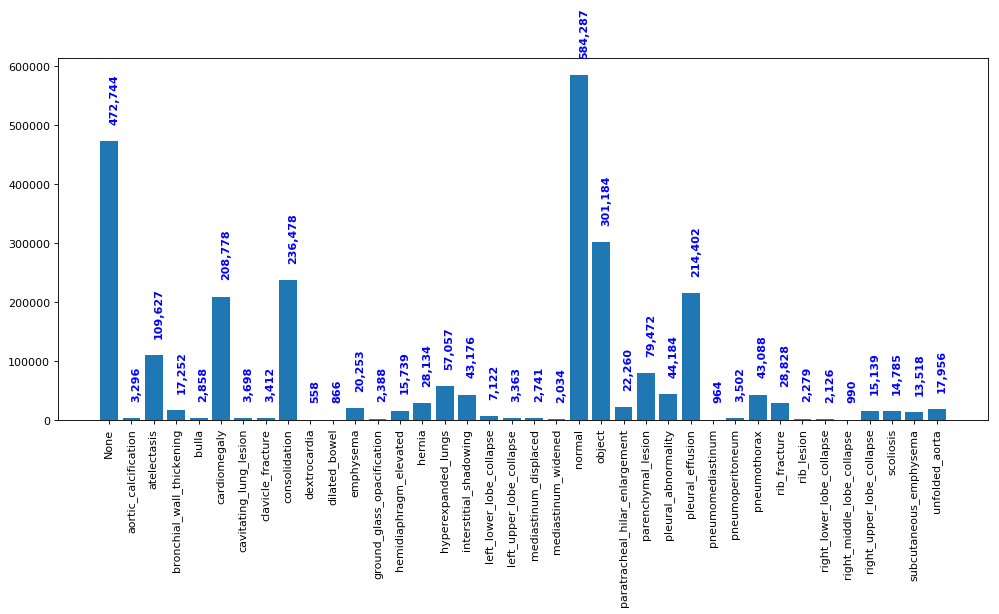

In [132]:
def plotDistLabels(dLabels, tagLabels=None):
    
    import matplotlib.pyplot as plt
    from collections import OrderedDict
    
    if not tagLabels:
        tagLabels = dLabels.keys()
        
    for tl in tagLabels:
        if tl not in dLabels:
            dLabels[tl] = 0
            
    dLabels = OrderedDict(sorted(dLabels.items(), key=lambda t: t[0]))

    fig, ax = plt.subplots(figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.bar(range(len(dLabels)), dLabels.values(), align='center')
    plt.xticks(range(len(dLabels)), dLabels.keys(), rotation='vertical')
    for i, v in enumerate(dLabels.values()):
        ax.text(i, v + max(dLabels.values())/20, '{:,}'.format(v), color='blue', fontweight='bold', rotation='vertical', verticalalignment='bottom')
    plt.show()
    
    
plotDistLabels(dLabelsInDB)

# Load previous reports to avoid intersection

In [22]:
dfPrevReports = pd.read_csv('/home/ydc19/Projects/chestXrays/ReportsForAnnotateX/selReports_RAND1K_ABNORMAL_1.csv', sep='$', encoding='utf-8')
idsOldData = list(dfPrevReports._id.unique())
len(idsOldData)

1000

In [3]:
collection.find_one()

{u'AccessionNumber': u'A84263b3da4c9e0cc6917782c21097ad8',
 u'AdmittingDiagnosesDescription': u'',
 u'Annotations': {u'Report': {u'Parsed': {u'Sentences': [{u'char_offsets': [[0,
        4],
       [5, 11],
       [12, 18],
       [19, 24],
       [24, 25]],
      u'deps_basic': [[u'root', -1, 2],
       [u'compound', 1, 0],
       [u'nsubj', 2, 1],
       [u'xcomp', 2, 3],
       [u'punct', 2, 4]],
      u'deps_cc': [[u'root', -1, 2],
       [u'compound', 1, 0],
       [u'nsubj', 2, 1],
       [u'xcomp', 2, 3],
       [u'punct', 2, 4]],
      u'pos': [u'NN', u'NNS', u'VBP', u'JJ', u'.'],
      u'tokens': [u'Lung', u'fields', u'appear', u'clear', u'.']}]},
   u'attributes': [],
   u'labels': [u'normal'],
   u'radlex_entity': [{u'RID': u'RID13437',
     u'eid': 0,
     u'indices': [0],
     u'main_class': u'anatomical_entity',
     u's_index': 0},
    {u'RID': u'RID38670',
     u'eid': 1,
     u'indices': [3],
     u'main_class': u'descriptor',
     u's_index': 0},
    {u'RID': u'bodylo

# 1,000 reports:
## Randomly selected from a set of reports with labels in the set of labels with less than 50 occurrences in the previous set (RAND_1K_ABNORMAL_1)
## Set of labels wanted:
### ['aortic_calcification', 'bulla', 'cavitating_lung_lesion', 'clavicle_fracture', 'dextrocardia', 'dilated_bowel', 'emphysema', 'rib_lesion', 'bronchial_wall_thickening', 'hemidiaphragm_elevated', 'hernia', 'left_lower_lobe_collapse', 'left_upper_lobe_collapse', 'mediastinum_displaced', 'parenchymal_lesion', 'paratracheal_hilar_enlargement', 'pneumomediastinum', 'pneumoperitoneum', 'pneumothorax', 'rib_fracture', 'right_middle_lobe_collapse', 'right_lower_lobe_collapse', 'right_upper_lobe_collapse', 'scoliosis', 'subcutaneous_emphysema', 'unfolded_aorta', 'mediastinum_widened', 'ground_glass_opacification']

## This label is not present in the old NLP: coronary_calcification


In [4]:
wantedLabels = ['aortic_calcification', 'bulla', 'cavitating_lung_lesion', 'clavicle_fracture', 'dextrocardia', 'dilated_bowel', 'emphysema', 'rib_lesion', 'bronchial_wall_thickening', 'hemidiaphragm_elevated', 'hernia', 'left_lower_lobe_collapse', 'left_upper_lobe_collapse', 'mediastinum_displaced', 'parenchymal_lesion', 'paratracheal_hilar_enlargement', 'pneumomediastinum', 'pneumoperitoneum', 'pneumothorax', 'rib_fracture', 'right_middle_lobe_collapse', 'right_lower_lobe_collapse', 'right_upper_lobe_collapse', 'scoliosis', 'subcutaneous_emphysema', 'unfolded_aorta', 'mediastinum_widened', 'ground_glass_opacification']

### Pipeline:
1. Select 50 rand docs from DB from each label in wantedLabels
2. Remove duplicate "reports"
3. Take 30 docs from the remaining.
4. Add ids to idsToExclude
5. Repeat steps 1 to 4 with next label

In [5]:
def getDfFromDocs(docs):
    # Convert docs into dataframe:
    docs = list(docs)
    dfReports = pd.DataFrame(columns=["_id","Report","labels"])

    dLabelsInSet = dict()
    for doc in docs:
        dfReports = dfReports.append(pd.Series([doc["_id"], doc["Report"], doc["Annotations"]["Report"]["labels"]], index=dfReports.columns), ignore_index=True)
        
    return dfReports

In [30]:
# docs = collection.aggregate([{"$match":{"_id": {"$nin": idsOldData},
#                                         "Annotations.Report.labels": { "$exists": True , "$in": wantedLabels},
#                                         "PatientAge": {"$gt": 5840}}},
#                              {"$sample": {"size": 10000}}], allowDiskUse=True)


idsToExclude = list(idsOldData)
idsWanted = []

for l in wantedLabels:
    docs = collection.aggregate([{"$match":{"_id": {"$nin": idsToExclude},
                                            "Annotations.Report.labels": { "$exists": True , "$in": [l]},
                                            "PatientAge": {"$gt": 5840}}},
                                 {"$sample": {"size": 50}}])
     # convert cursor to list (static)
    dfReports = getDfFromDocs(docs)
    dfReportsUnique = dfReports.drop_duplicates(subset=['Report']).copy()    
    idsWanted.extend(dfReportsUnique._id.unique()[0:30])
    idsToExclude.extend(idsWanted)

# Fill up to 1000 randomly:
docsMissing = 1000 - len(idsWanted)
docs = collection.aggregate([{"$match":{"_id": {"$nin": idsToExclude},
                                            "Annotations.Report.labels": { "$exists": True , "$in": wantedLabels},
                                            "PatientAge": {"$gt": 5840}}},
                                 {"$sample": {"size": 2*docsMissing}}])
dfReports = getDfFromDocs(docs)
dfReportsUnique = dfReports.drop_duplicates(subset=['Report']).copy()
idsWanted.extend(dfReportsUnique._id.unique()[0:docsMissing])

In [35]:
# Get the data from the ones wanted:
docs = collection.find({"_id": {"$in": idsWanted}})
dfReportsRAND1K2 = getDfFromDocs(docs)
len(dfReportsRAND1K2)

1000

In [36]:
dfReportsRAND1K2.head()

_id                                             Report  \
0   2168  There is opacity seen at the right lower zone ...   
1   5579  Bilateral congestive changes with collapse in ...   
2  11706  Heart size normal, the lungs appear clear. The...   
3  13700  There is aneurysmal dilatation of the thoracic...   
4  23280  Comparison is made to the previous study from ...   

                                             labels  
0  [right_middle_lobe_collapse, parenchymal_lesion]  
1                       [right_lower_lobe_collapse]  
2                  [paratracheal_hilar_enlargement]  
3                             [mediastinum_widened]  
4         [hyperexpanded_lungs, bulla, atelectasis]

In [37]:
dfReportsRAND1K2.to_csv('/home/ydc19/Projects/chestXrays/ReportsForAnnotateX/selReports_RAND1K_ABNORMAL_2.csv', index=False, columns=dfReportsRAND1K2.columns, sep='$', encoding='utf-8')